## Conditions for coexistence point in a multi-species Lotka-Volterra model

It is straightforward to generalize the classic competition Lotka-Volterra equations to treat multiple species:

$$ \begin{equation}\frac{dN_i}{dt} = r_i N_i \left( 1 - \sum_j a_{ij} N_j \right) \end{equation}$$

where $a_{ij} \geq 0$ is the effect of species $j$ on species $i$, and $a_{ii} = \frac{1}{K_i}$. A fixed point has to satisfy:

$$ \sum_j a_{ij} N_j = 1 \;,\forall\, i $$

In particular, in order for it to be positive, we must have:

$$ N_i = 1-\frac{1}{a_{ii}}\sum_{j \neq i} a_{ij}N_j > 0  \;,\forall i$$

Each population, in isolation, reaches at maximum its carrying capacity ($N_j^\ast \leq 1/a_{jj}$). Then a sufficient (but not necessary) condition for mutual invasibility - which guarantees the existence of such a fixed point - is:

$$ \frac{1}{a_{ii}}\sum_{j \neq i} a_{ij}N_j \leq \frac{1}{a_{ii}}\sum_{j \neq i} \frac{a_{ij}}{a_{jj}} < 1 \; , \forall i$$

Expressing $a$ as a matrix, this means that, in every column, its entries divided by the diagonal entry of each line sums up to at most the diagonal term of the column. we can make this simpler by reescalonating all populations by their carrying capacities, so that $N_i' = a_{ii} N_i$, and $b_{ij} = a_{ij}/a_{jj}$ (in particular, $b_{ii}=1$), so the differential equations read (after dropping the primes):

$$ \frac{dN_i}{dt} = r_i N_i \left( 1 - N_i - \sum_{j\neq i} b_{ij} N_j \right) $$

and the condition above is simply:

$$ \begin{equation}\boxed{\sum_{j\neq i} b_{ij} < 1 \;,\forall i}\end{equation}$$

which says that the sum over all non-diagonal entries of each column must be smaller than 1.

Approaching the problem using matrix algebra, the solution is

$$ \begin{equation}N^* = B^{-1} [1] ~,\end{equation}$$ or without reescalonating, $N^* = A^{-1} [1]$,

where $N^*$ is the vector of populations, $B$ ($A$) is the matrix composed by the $b_{ij}$ ($a_{ij}$), and $[1]$ is a column whose entries are 1. We can also find the fixed point by iteration, yielding:

$$ N^* = \left(\sum_{i=0}^\infty (-1)^i B^i\right) [1] $$


### Stability criteria

Assuming that a positive fixed point exists, the Jacobian calculated at that point is

$$ \begin{equation} \boxed{J_{ij} = r_i N^*_i b_{ij}} \end{equation}$$

and the stability is determined by the real part of its largest eigenvalue. One *necessary* condition for stability is

$$ \begin{equation} (-1)^S det(B) > 0 \end{equation}$$

where $S$ is the number of species. The same criterion applies without reescalonating, that is, $(-1)^S det(A) > 0$.

### Summary

We have two *necessary* conditions for existence of a stable fixed point:

* $N^* = B^{-1} [1]$ yields positive values only for the populations $N_i$.
* $(-1)^S det(B) > 0$

Both of those are also valid without changing the population scales, that is, for the matrix $A$.

We have a *sufficient* condition for mutual invasibility, that guarantees that the solution is positive:

$$ \sum_{j\neq i} b_{ij} < 1 \;,\forall i $$

That, rewritten in terms of non-rescaled parameters, reads:

$$ \frac{1}{a_{ii}}\sum_{j \neq i} \frac{a_{ij}}{a_{jj}} < 1 \; , \forall i$$

We can establish through simulations that the first two necessary conditions are not sufficient, by exhibiting systems that satisfy them but whose simulated solution leads to exclusion of some populations. The same information could be obtained by calculating the eigenvalue around the coexistence fixed point.

## Nota
Preenchi a diagonal da matriz B com 1's e aí o sorteio resulta em solucao estavel, ao contrário do que está escrito acima.

Populating the interactive namespace from numpy and matplotlib
eigenvalues: [ 1.00000000+0.j          0.12182998+0.j          0.17219520+0.08422372j
  0.17219520-0.08422372j  0.15465017+0.05099701j  0.15465017-0.05099701j
  0.37216516+0.06389319j  0.37216516-0.06389319j  0.36118470+0.j
  0.47525903+0.j        ]
final populations: [ 0.24471983  0.30743987  0.42175762  0.4921814   0.2068496   0.55848547
  0.53273846  0.27448449  0.17207237  0.14556564]


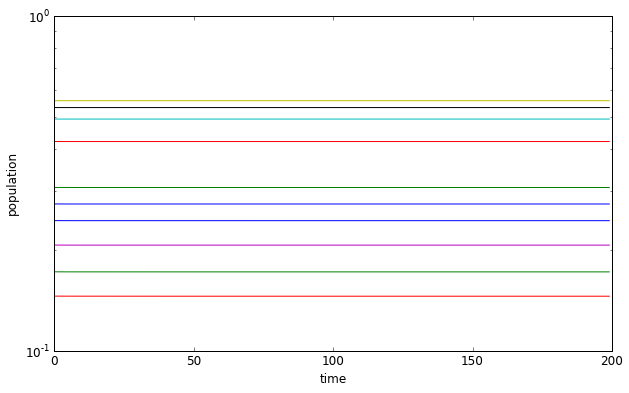

In [2]:
# imports numpy and matplotlib with inline figures
%pylab inline
# larger plots and fonts, please
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
pylab.rcParams['font.size'] = 12

from scipy.integrate import odeint

# number of species
S = 10

# let's generate random matrices that satisfy the necessary conditions
N = D = -1
while any(N <= 0) or D < 0:
    A = abs(random.normal(0, .3, size=(S, S)))
    fill_diagonal(A, 1) # fill diagonal with ones
    N = solve(A, ones(S))
    D = (-1)**S * det(A)

# we can compute the stability directly calculating the eigenvalues
# we assume all r_i = 1
J = A * N[:,newaxis]
# print(A) # uncomment if to check A matrix
print('eigenvalues:', eigvals(J))

# or we can solve the corresponding system of ODEs
# again, assume all r_i = 1
def LK(y, t):
    return y * (1 - A.dot(y))

y0 = N + 1e-4 * ones(S)
t = arange(0, 200, 1.)
n = odeint(LK, y0, t)
plot(t, n)
yscale('log')
xlabel('time')
ylabel('population')
print ('final populations:', n[-1])

## Recurrent perturbation as an average extra mortality

Suppose that at every period $\tau$ the system suffers a perturbation that causes a fraction $m$ of the populations to die. The way this happens is a key assumption for what we do next: if perturbation occurs via depletion of resources, or by reduction of the available area, we would expect competition, both intra- and inter-specific, to be altered in some way. By assuming that this perturbation leads directly to death, we avoid such complications (which could be interesting nonetheless, but more complex).

We will look at a single population, but later we will see that the same result should apply to any number of populations. The single species case reduces to the logistic equation, with a periodic impulse (this is a so-called *impulsive differential equation*):

$$ \begin{aligned}
    \frac{dN}{dt} &= rN\left(1-\frac{N}{K}\right) &\text{for }t \neq k \tau \\
    N(t^+) &= (1-m) N(t^-) &\text{at } t=k\tau, k\in\mathbb{N}
\end{aligned}$$

We average the mortality in the following way: the solution of the recurrence relation, ignoring the dynamics in the continuous interval, would be $N(t_k) = (1-m)^k N(t_0) = N(t_0) e^{k\log(1-m)}$. Approximating this solution in continuous time, it would become $N(t) = N(0) e^{\frac{t}{\tau}\log(1-m)}$. This is the same solution that would be obtained from a differential equation that read 

$$ \frac{dN}{dt} = \frac{\log(1-m)}{\tau} N = -dN $$

Therefore we set $d = -\frac{log(1-m)}{\tau}$ and rewrite a continuous time differential equation including the discrete perturbation as a continuous mortality:

$$ \frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) -dN$$

Inverting the expression for $d$, we have that $m = 1-e^{-d \tau}$. We compare the solutions of the impulsive and the ordinary (continuous) differential equations below.

Populating the interactive namespace from numpy and matplotlib


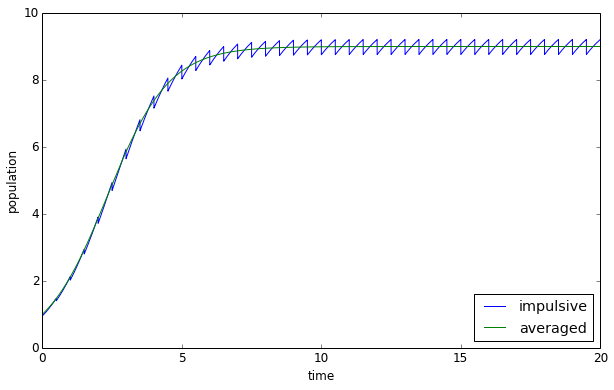

In [2]:
# imports numpy and matplotlib with inline figures
%pylab inline
# larger plots and fonts, please
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
pylab.rcParams['font.size'] = 12
from scipy.integrate import odeint

r = 1.
K = 10.
tau = .5
d = .1
m = 1 - exp(-d*tau)
tmax = 20.
# number of jumps
n = int(tmax / tau)
y0 = 1.
# time-step of integration, should be much smaller than tau
dt = 0.001

def logist(y, t, r, K, d):
    return r*y*(1-y/K) - d*y

# the impulsive equation
t = arange(0, tau+dt/2., dt)
y = array([y0])
for i in range(n):
    yi = odeint(logist, y[-1]*(1-m), t, (r, K, 0))
    y = vstack((y, yi[1:]))
y = y[1:]

# the average differential equation
tt = arange(0, n*tau, dt)
ya = odeint(logist, y0, tt, (r, K, d))

plot(tt, y, label='impulsive')
plot(tt, ya, label='averaged')
xlabel('time')
ylabel('population')
legend(loc='lower right')


## Coexistence under a constant mortality

Now let us suppose that there is a recurrent perturbation, that can be approximated by a constant mortality rate, $d$, that inflicts all the populations equally. We assume that this mortality is smaller than the maximum growth rate of every population ($d < r_i$). So the equations are now:

$$ \begin{equation}\frac{dN_i}{dt} = r_i N_i \left( 1 - N_i - \sum_{j\neq i} b_{ij} N_j \right) - d N_i \end{equation}$$

This can be rearranged as

$$ \frac{dN_i}{dt} = (r_i-d) N_i \left( 1 - \frac{r_i}{r_i-d}N_i - \frac{r_i}{r_i-d}\sum_{j\neq i} b_{ij} N_j \right)$$

that can be reescalonated by $N_i' = \frac{r_i}{r_i-d} N_i$, leading to (dropping primes):

$$ \begin{equation} \frac{dN_i}{dt} = (r_i-d) N_i \left( 1 - N_i - \frac{r_i}{r_i-d}\sum_{j\neq i} b_{ij} N_j \frac{r_j-d}{r_j} \right) \end{equation}$$

This system is of the same form as in the first section, with

$$ \begin{align}
    r_i' &= r_i-d \\
    b_{ij}' &= \frac{1-\tfrac{d}{r_j}}{1-\tfrac{d}{r_i}} b_{ij}
    \end{align} $$

Now the condition for existence of the fixed point becomes

$$ \frac{r_i}{r_i-d} \sum_{j\neq i} \left(1-\frac{d}{r_j}\right) b_{ij} = 
\frac{1}{c_i} \sum_{j\neq i} c_j b_{ij} < 1 \;,\forall i$$

where $c_i \equiv \left(1-\frac{d}{r_i}\right) \leq 1$ always increases with $r_i$.

Under the original population scale (that is, using the $a_{ij}$ parameters), the addition of a mortality $d$ leads to a new system with parameters equivalent to:

$$ \begin{align}
    r_i'&= r_i-d \\
    a_{ij}' &= \frac{1}{1-\tfrac{d}{r_i}} a_{ij}
    \end{align} ~,$$
    
which affects the carrying capacities $K_i = \frac{1}{a_{ii}}$ as well.

## The 2-species case

The analysis is considerably simpler if we have only 2 species. In this case, we can compute the fixed point directly as well. First, the conditions for the $C_i$ are:

$$ C_1 = \frac{c_2}{c_1} b_{12} < 1\quad 
   C_2 = \frac{c_1}{c_2} b_{21} < 1
$$

We can see that $C_1 C_2 = b_{12}b_{21}$, so if we start with $b$'s such that this product is greater than $1$, it is impossible to have both $C$'s smaller than $1$, no matter the value of the $c_i$'s (that is, $d$ and the $r_i$'s).

So much for sufficient conditions. The fixed points can be found explicitly (assuming no perturbation):

$$ N_1^* = \frac{1-b_{12}}{1-b_{21} b_{12}} \quad N_2^* = \frac{1-b_{21}}{1-b_{21} b_{12}}$$

and the Jacobian at this fixed point is:

$$ J = \begin{pmatrix} 
-r_1 N_1^*       & -b_{12} r_1 N_1^* \\
-b_{21} r_2 N_2^* &-r_2 N_2^*
\end{pmatrix} $$

So the necessary and sufficient conditions for stable coexistence are $b_{12} b_{21} < 1$ and $b_{12}, b_{21} < 1$. Under perturbation, the first condition ($b_{12} b_{21} < 1$) remains the same, while the second reads $b_{12}c_2/c_1, b_{21}c_1/c_2 < 1$. Thus, if in the absence of perturbation one species is excluded but the first condition is met, there will be a value for the perturbation $d$ that leads to coexistence if the initially excluded species has a higher $r$.


### The net effect of mortality -- useless analysis since $C_i$ is too restrictive

We define $C_i$ as:

$$ C_i(d, \vec{r}, B) \equiv \frac{1}{c_i} \sum_{j\neq i} c_j b_{ij} $$

so that the coexistence condition is just $C_i < 1$. We can assess the effect of the perturbations by calculating $\frac{dC_i}{dd}$:

$$
\frac{dC_i}{dd} = \frac{1}{r_i-d} \left(C_i - r_i \sum_{j\neq i} \frac{1}{r_j} b_{ij}\right)
=  \frac{r_i}{(r_i-d)^2} \sum_{j\neq i} \left(\frac{r_j-r_i}{r_j} b_{ij}\right)
$$

We thus see that **perturbation facilitates the persistence of fast-growing species** ($r_i > r_j$ for every $j$ leads to $dC/dd < 0$).

### Trade-offs between growth and competitive ability -- let's not do it this way

Let us rewrite the last condition in terms of the original competition parameters $a_{ij}$:

$$ \frac{1}{a_{ii}\left(1-\frac{d}{r_i}\right)}\sum_j \left(1-\frac{d}{r_j}\right)\frac{a_{ij}}{a_{jj}}  < 1 \;,\forall i$$

Now introduce a trade-off between intrinsic growth rate $r$ and competitive ability $a$. 

PS: numbered equations in the notebook: edit 
/usr/lib/python3.4/site-packages/IPython/html/static/notebook/js/mathjaxutils.js

source: http://stackoverflow.com/questions/18823779/ipython-notebook-and-mathjax-labeled-equations